In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs=torch.ones([6])/6
print(fair_probs)
print(multinomial.Multinomial(1,fair_probs).sample())

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])
tensor([1., 0., 0., 0., 0., 0.])


In [3]:
print(multinomial.Multinomial(10,fair_probs).sample())

tensor([1., 3., 1., 1., 4., 0.])


In [6]:
#将结果储存为32位浮点数进行除法
counts=multinomial.Multinomial(1000,fair_probs).sample()
print(counts/1000)#频率作为概率

tensor([0.1590, 0.1690, 0.1620, 0.1920, 0.1620, 0.1560])


tensor([[1., 2., 0., 4., 0., 3.],
        [2., 1., 0., 2., 1., 4.],
        [3., 2., 0., 1., 1., 3.],
        ...,
        [2., 4., 1., 0., 2., 1.],
        [1., 4., 1., 2., 1., 1.],
        [1., 1., 0., 2., 2., 4.]])


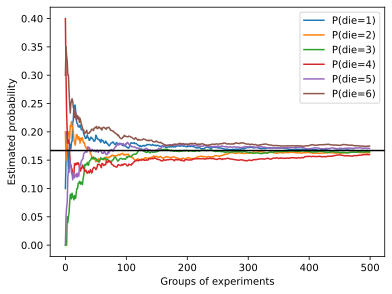

In [19]:
#进行500组实验，每组抽取10个样本
counts=multinomial.Multinomial(10,fair_probs).sample((500,))
print(counts)
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdims=True)
d2l.set_figsize((6,4.5))#设置图表尺寸
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                 label=("P(die=" + str(i+1)+")"))
d2l.plt.axhline(y=0.167,color='black')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()